In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colab files/mdsc-102/top_six_economies.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

print('Various countries in this dataset are : ',df['Country Name'].unique(),'\n\n')
df.info()

Various countries in this dataset are :  ['United States' 'China' 'Japan' 'Germany' 'United Kingdom' 'India'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 17 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         180 non-null    object 
 1   Year                                                                 180 non-null    int64  
 2   GDP (current US$)                                                    180 non-null    float64
 3   GDP, PPP (current international $)                                   180 non-null    float64
 4   GDP per capita (current US$)                                         180 non-null    float64
 5   GDP growth (annual %)                                                180 non-null    float6

In [2]:
df.columns

Index(['Country Name', 'Year', 'GDP (current US$)',
       'GDP, PPP (current international $)', 'GDP per capita (current US$)',
       'GDP growth (annual %)', 'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Central government debt, total (% of GDP)',
       'Total reserves (includes gold, current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Inflation, consumer prices (annual %)',
       'Personal remittances, received (% of GDP)', 'Population, total',
       'Population growth (annual %)',
       'Life expectancy at birth, total (years)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'],
      dtype='object')

In [3]:
df.isnull().sum()

Country Name                                                            0
Year                                                                    0
GDP (current US$)                                                       0
GDP, PPP (current international $)                                      0
GDP per capita (current US$)                                            0
GDP growth (annual %)                                                   0
Imports of goods and services (% of GDP)                                0
Exports of goods and services (% of GDP)                                0
Central government debt, total (% of GDP)                              70
Total reserves (includes gold, current US$)                             0
Unemployment, total (% of total labor force) (modeled ILO estimate)     0
Inflation, consumer prices (annual %)                                   0
Personal remittances, received (% of GDP)                               0
Population, total                     

In [4]:
df.fillna(0.0,inplace=True)
df.isnull().sum()

Country Name                                                           0
Year                                                                   0
GDP (current US$)                                                      0
GDP, PPP (current international $)                                     0
GDP per capita (current US$)                                           0
GDP growth (annual %)                                                  0
Imports of goods and services (% of GDP)                               0
Exports of goods and services (% of GDP)                               0
Central government debt, total (% of GDP)                              0
Total reserves (includes gold, current US$)                            0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
Inflation, consumer prices (annual %)                                  0
Personal remittances, received (% of GDP)                              0
Population, total                                  

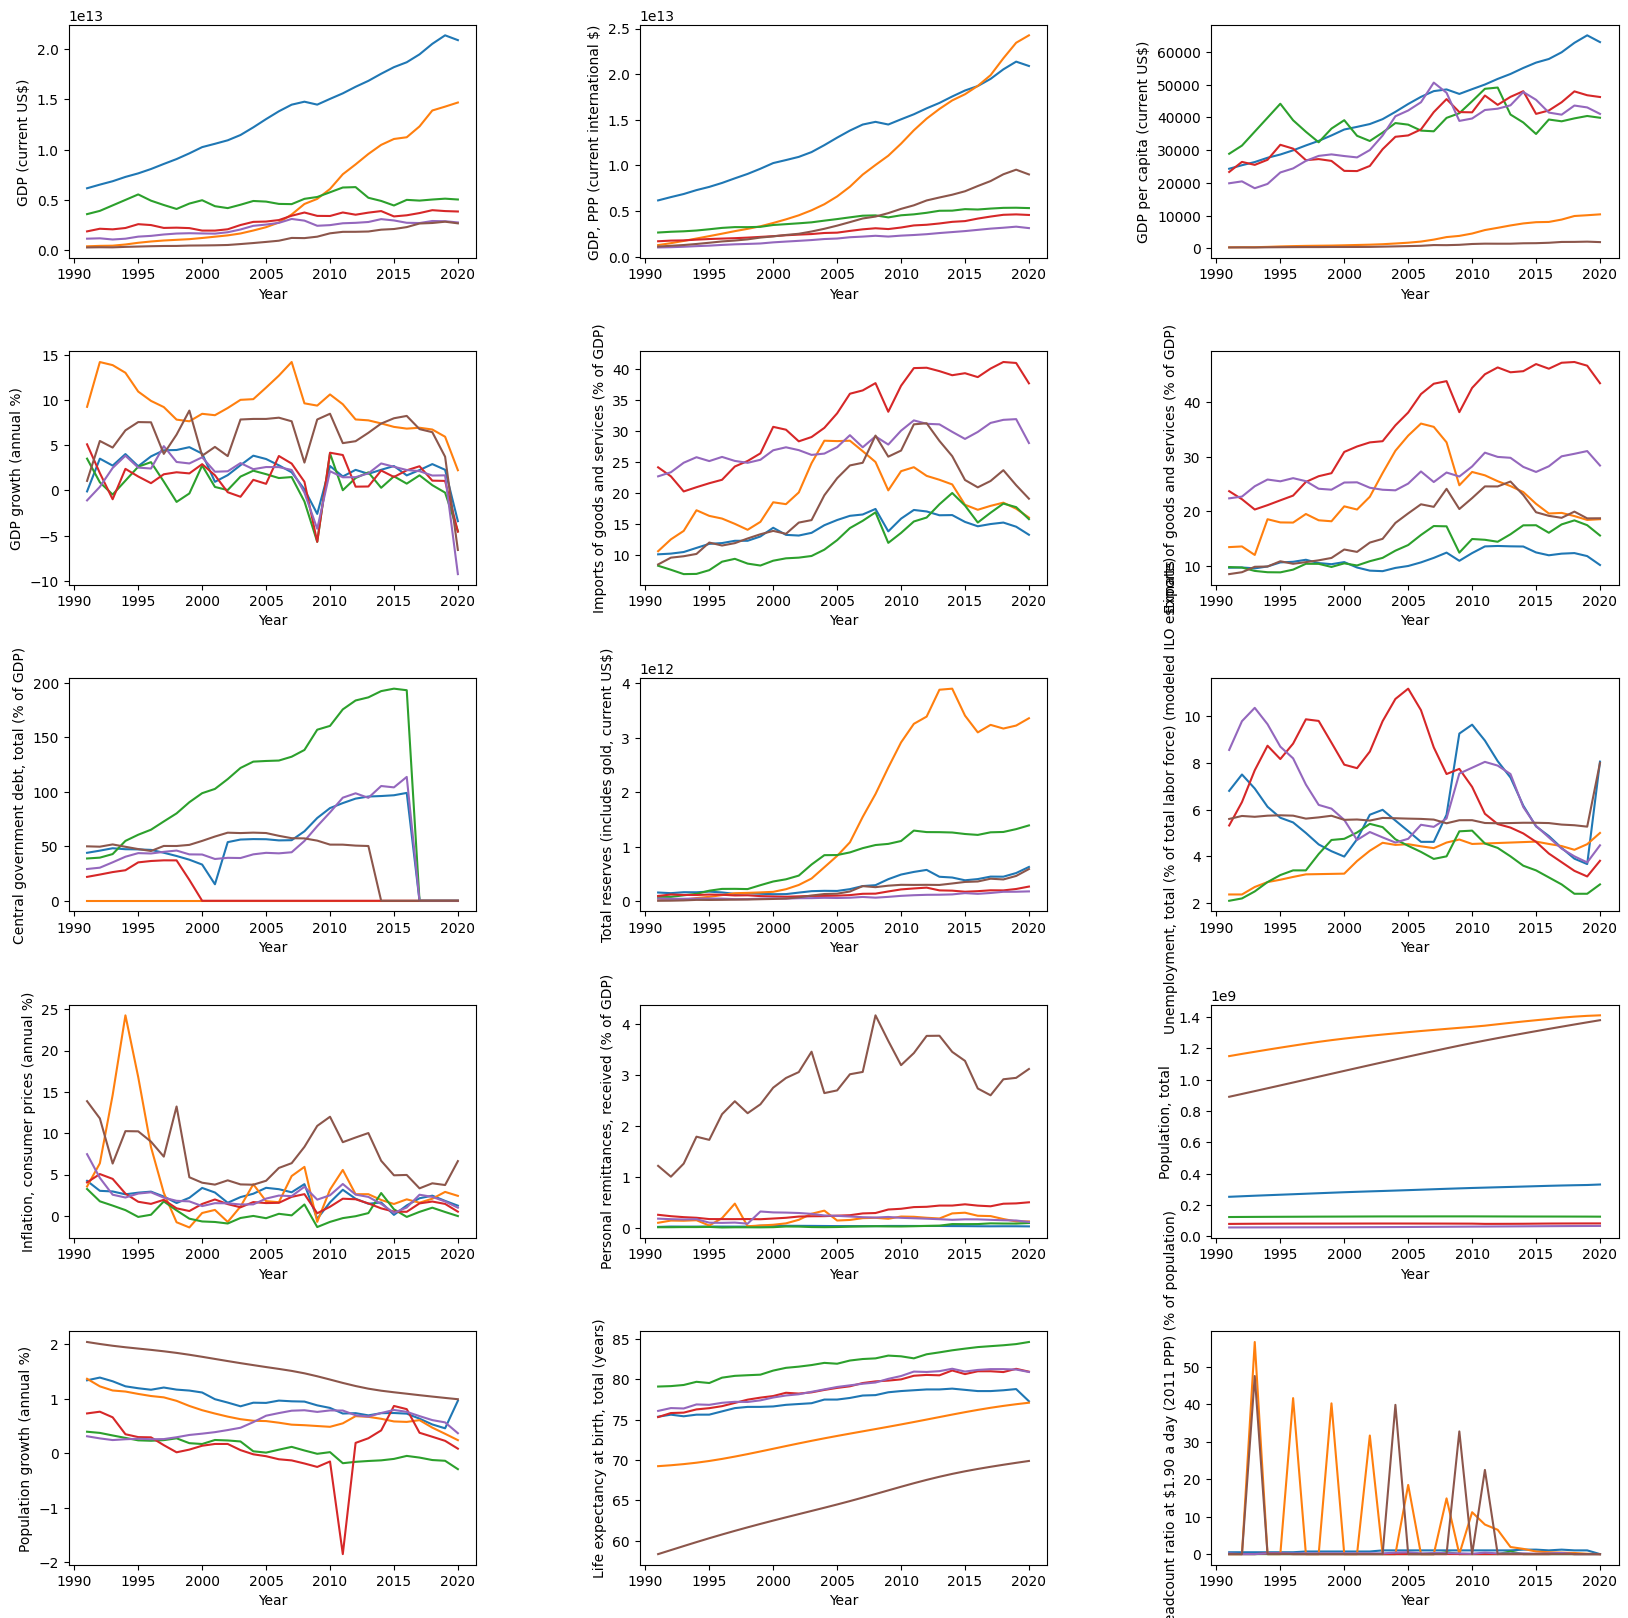

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , axes = plt.subplots(5,3,figsize=(20,20))    #setting the total size of the plotting
fig.subplots_adjust(hspace=0.4,wspace=0.4)        #adjusting the space b/w each subplot

indicators = list(df.columns)
indicators.remove('Country Name') , indicators.remove('Year')

indicators
i , j = 0 , 0

for ind in indicators:

  sns.lineplot(ax=axes[i,j],x='Year',y=ind,data=df,hue='Country Name',legend=False)

  # axes[i,j].legend(loc='upper left')
  j = j + 1

  if j > 2:
    j = 0
    i = i + 1


<Axes: xlabel='Country Name', ylabel='Life expectancy at birth, total (years)'>

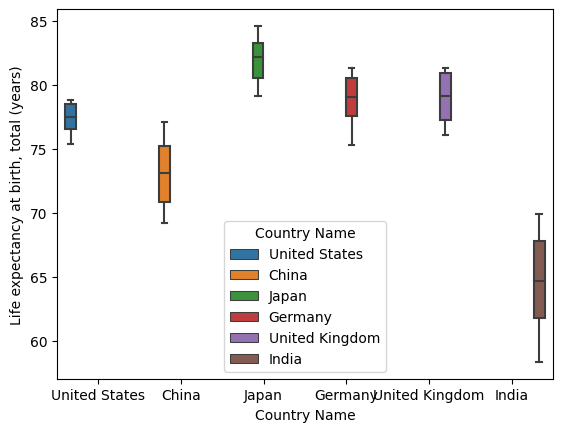

In [16]:
sns.boxplot(data=df,x='Country Name',y='Life expectancy at birth, total (years)',hue='Country Name')

<Axes: xlabel='Country Name'>

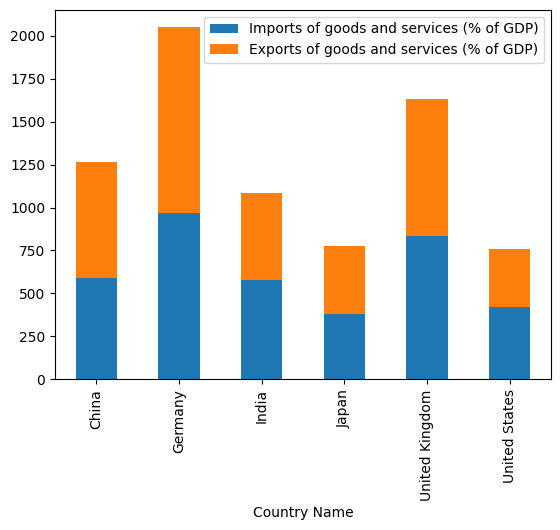

In [6]:
imports_exports = df.groupby(df['Country Name'])[['Imports of goods and services (% of GDP)','Exports of goods and services (% of GDP)']].sum()
imports_exports.plot(kind='bar',stacked=True)

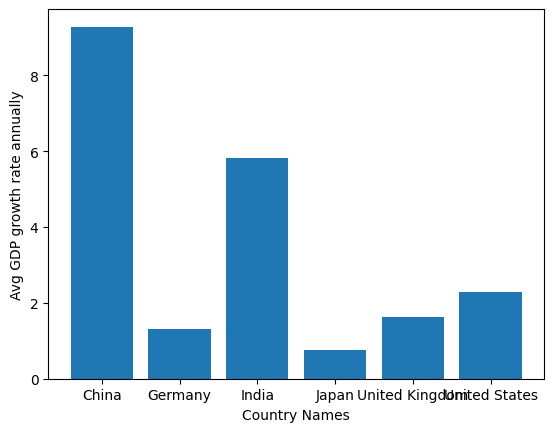

In [7]:
avg_gdp = df.groupby(df['Country Name'])['GDP growth (annual %)'].mean().reset_index()
plt.bar(avg_gdp['Country Name'],avg_gdp['GDP growth (annual %)'])
plt.xlabel('Country Names')
plt.ylabel('Avg GDP growth rate annually')
plt.show()

<Axes: xlabel='Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)', ylabel='Life expectancy at birth, total (years)'>

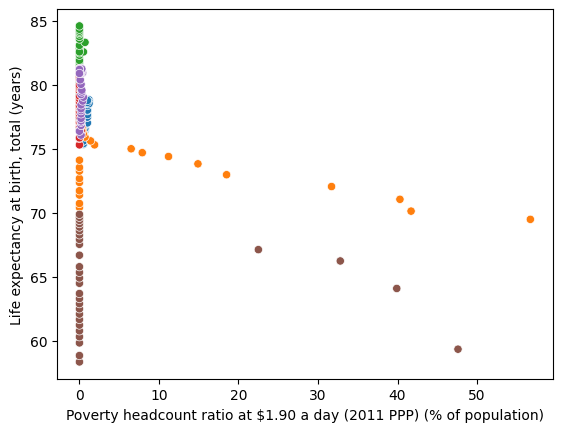

In [8]:
sns.scatterplot(y='Life expectancy at birth, total (years)',x='Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',data=df,hue='Country Name',legend=False)

<ipython-input-9-b8ff9fd54712>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dependency = df.corr()


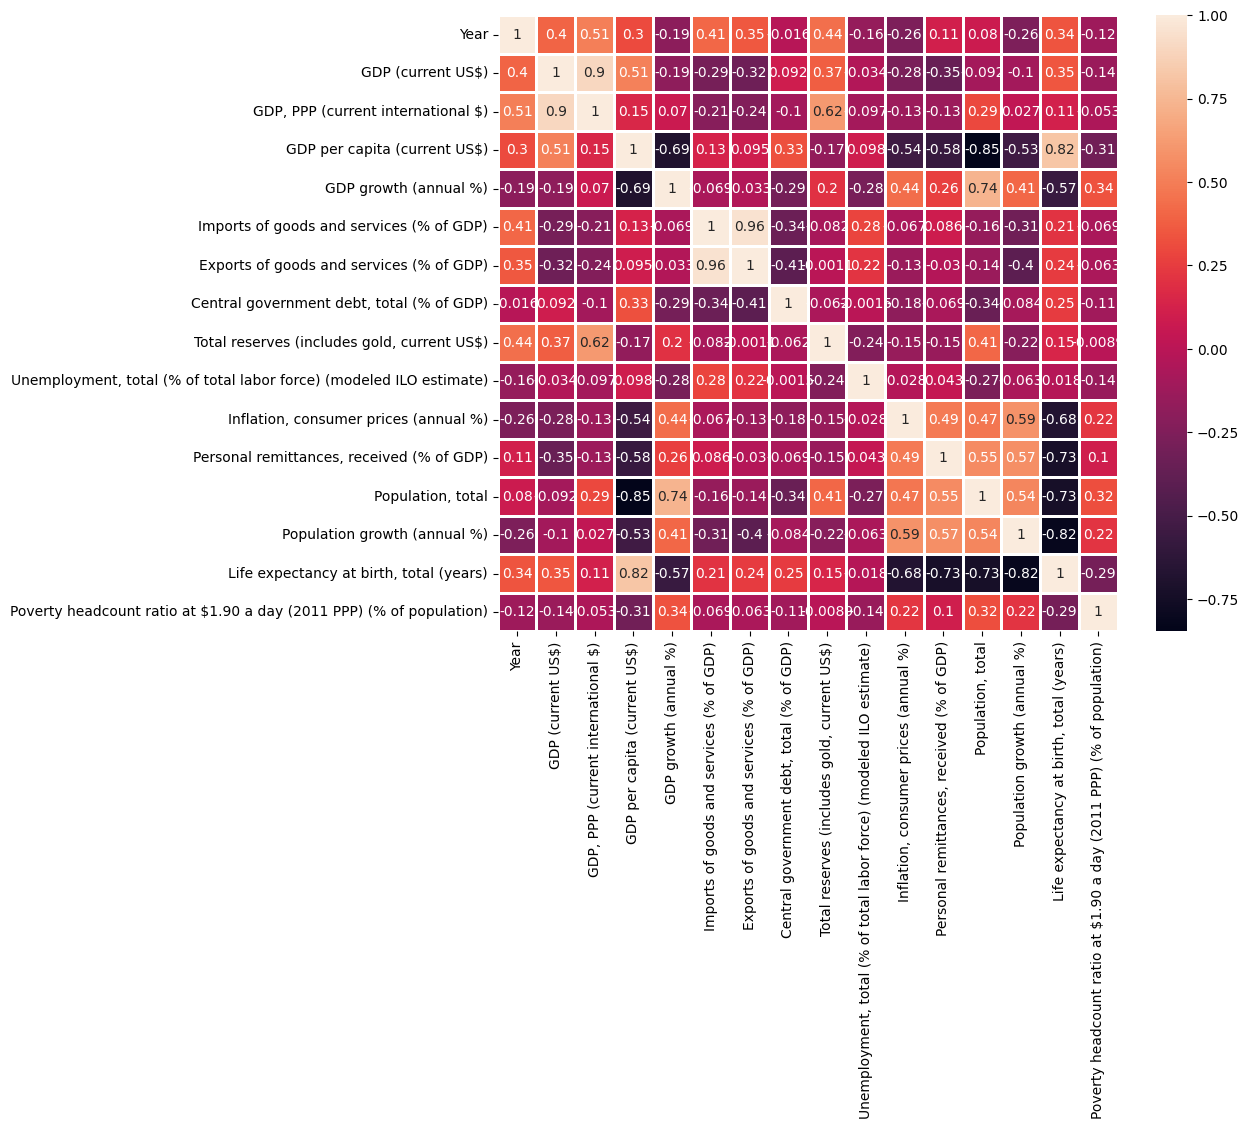

In [9]:
dependency = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(dependency,annot=True,linewidth=2)
plt.show()

gdp per capita vs personal remittance - done
gdp PPP vs gdp annual growth - done
population and life expectancy
imoprt and export of goods - done
gdp per capita and population growth
inflation vs population growth - done
inflation vs personal remittance
unemployment vs gdp growth -
total reserves vs year - done
life expectancy vs year
GDp per capita vs life expectancy -done

In [10]:
df.groupby(df['Country Name'])[['GDP growth (annual %)']].mean()

,GDP growth (annual %)
Country Name,
China,9.285176
Germany,1.309870
India,5.821133
Japan,0.749033
United Kingdom,1.629127
United States,2.288380


According to the records , the average life expectancy of a person in the world is 72.72 years as of 2020. I'm performing hypothesis testing on this based on the 180 samples that I have in my dataframe.

$ H_0 : \mu_0 = 72.72$

VS

$ H1 : \mu_0 \neq 72.72$

In [11]:
from scipy import stats
import numpy as np

# loading the data sample from df
sample = df['Life expectancy at birth, total (years)']

# setting level of significance and null hypothesis
alpha = 0.05
mu_0 = 72.72

# for normalising the data using boxcox
temp , lamda = stats.boxcox(sample)
old_skew = sample.skew()
print('lambda = ',lamda)

# printing the skweness before and after normalisation
print('skewness before normalisation = ',old_skew)

# sample = (temp - np.mean(temp))/np.std(temp)
# sample = pd.Series(sample)

print('skewness = ', pd.Series(temp).skew())
print('distribution of the data is standard normal with parameters : ',temp.mean(),temp.var())

# variance is unknown but sample size is large , hence we use z-test
z_calc = (np.mean(temp) - (mu_0**lamda - 1)/lamda)/((np.var(temp)/(len(sample)))**0.5)

print('z_calc = ',z_calc)

lambda =  7.0930666786769505
skewness before normalisation =  -1.112432785369464
skewness =  -0.19484222635952386
distribution of the data is standard normal with parameters :  3414764220801.7456 2.2158095045358187e+24
z_calc =  10.412944918747307


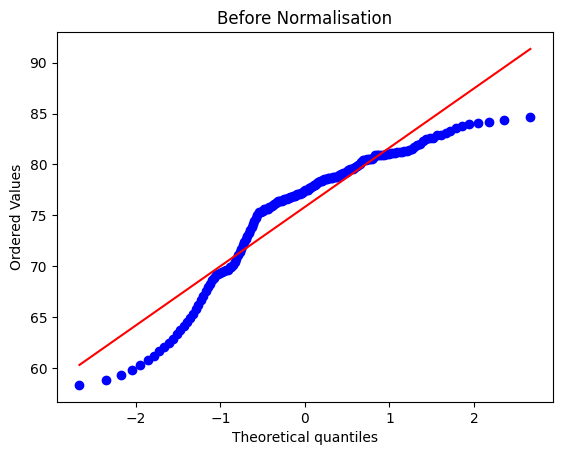

In [12]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(df['Life expectancy at birth, total (years)'], dist="norm", plot=plt)
plt.title('Before Normalisation')
plt.show()

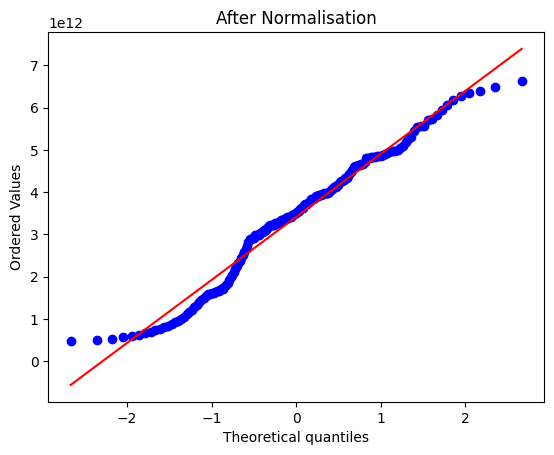

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(temp, dist="norm", plot=plt)
plt.title('After Normalisation')
plt.show()

In [14]:
# calculating the p-value
p = 2 * (1 - stats.norm.cdf(abs(z_calc)))

print('p_value = ',p)

# if p value is less than level of significance , we reject our H0
if p < alpha:
  print('Reject - Avg life span of a person != 72.72')

else:
  print('Do not reject - Avg life span of a person = 72.72')

p_value =  0.0
Reject - Avg life span of a person != 72.72
